**Loading of Datasets**

In [98]:
import pandas as pd
df=pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data",names=["age","sex","cp","trestbps","chol","fbs","restecg","thalach","exang","oldpeak","slope","ca","thal","num"])

In [99]:
df.head(n=20)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
5,56.0,1.0,2.0,120.0,236.0,0.0,0.0,178.0,0.0,0.8,1.0,0.0,3.0,0
6,62.0,0.0,4.0,140.0,268.0,0.0,2.0,160.0,0.0,3.6,3.0,2.0,3.0,3
7,57.0,0.0,4.0,120.0,354.0,0.0,0.0,163.0,1.0,0.6,1.0,0.0,3.0,0
8,63.0,1.0,4.0,130.0,254.0,0.0,2.0,147.0,0.0,1.4,2.0,1.0,7.0,2
9,53.0,1.0,4.0,140.0,203.0,1.0,2.0,155.0,1.0,3.1,3.0,0.0,7.0,1


**Conversion of Object to float datatype**

In [100]:
df['ca'] = pd.to_numeric(df['ca'],errors='coerce')
df['thal'] = pd.to_numeric(df['thal'],errors='coerce')
df['ca'] = pd.to_numeric(df['num'],errors='coerce')

**Checking and elimination of null values**

In [101]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        2
num         0
dtype: int64

**Elimination of null values by replacing null values with mean**

In [102]:
mean_value=df['thal'].mean()
df.fillna(value=mean_value,inplace=True)
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64

**CountPlot using seaborn library**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


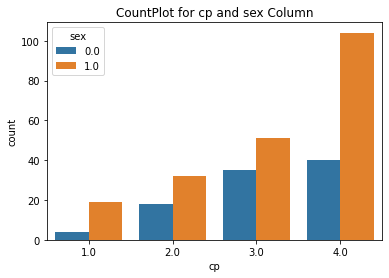

In [103]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot('cp',data=df,hue='sex')
plt.title('CountPlot for cp and sex Column')
plt.show()

**Catplot using Seaborn Library**

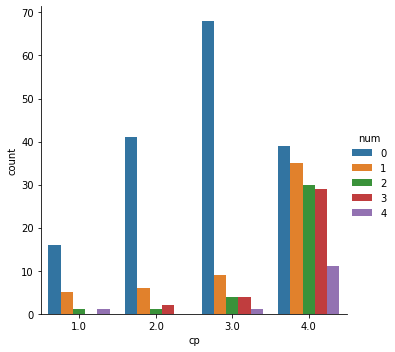

In [104]:
sns.catplot(x="cp",kind="count",hue="num",data=df)

**Storing of x and y values for building model**

In [105]:
x,y=df.loc[:,:'thal'],df['num']

**Spliting Training and Testing Data (70% training and 30% testing data)**

In [106]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=10,test_size=0.3,shuffle=True)

**Knn Classifier**

In [107]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [108]:
knn=KNeighborsClassifier(n_neighbors=6)
knn.fit(x_train,y_train)
knn_pred=knn.predict(x_test)
knn_accuracy_model=accuracy_score(y_test,knn_pred)
score=knn_accuracy_model*100

In [109]:
print('the accuracy of the model is: ',score)

the accuracy of the model is:  48.35164835164835


**Improvising Accuracy using Random Forest Algorithm**

In [110]:
from sklearn.ensemble import RandomForestClassifier

**Ideal parameters are n_estimators= 10, criterion="entropy"**

In [111]:
random_forest= RandomForestClassifier(n_estimators= 10, criterion="entropy")

In [112]:
random_forest.fit(x_train, y_train) 

RandomForestClassifier(criterion='entropy', n_estimators=10)

**Prediction and Generation of Accuracy for the given model**

In [113]:
rf_pred=random_forest.predict(x_test)

In [114]:
rf_accuracy_model = accuracy_score(y_test,rf_pred)

In [115]:
accuracy=rf_accuracy_model*100

In [116]:
print('the accuracy obtained by using random forest algorithm is ',accuracy)

the accuracy obtained by using random forest algorithm is  85.71428571428571
